# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **MENGHUBUNGKAN KE GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
path = "/content/grive/MyDrive/1.KULIAH/Semester 7/Machine Learning/praktikum05"

# **MEMBACA FILE CSV**

In [ ]:
df = pd.read_csv(path + "/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **INFORMASI DETAIL FILE**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# **DATA PREPROCESSING**

In [ ]:
#Cek Missing Value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#Cek Duplicate
df.duplicated().sum()

np.int64(0)

# **DATA UNDERSTANDING**

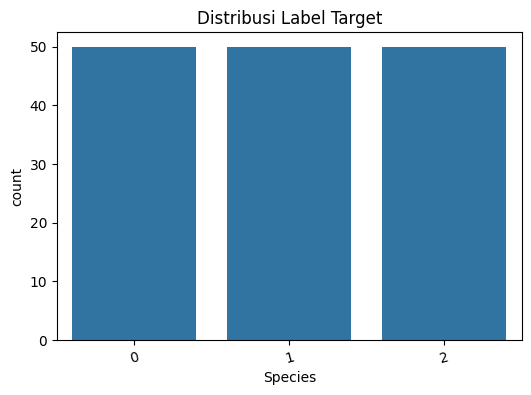

In [ ]:
#Visualisasi Distribusi Label Target
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df)
plt.title('Distribusi Label Target')
plt.xticks(rotation=15)
plt.show()

# **ENCODING DATA KATEGORIKAL**

In [ ]:
species_cat = df['Species'].astype('category')
species_classes = list(species_cat.cat.categories)
df['Species'] = species_cat.cat.codes
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# **ANALISIS KORELASI**

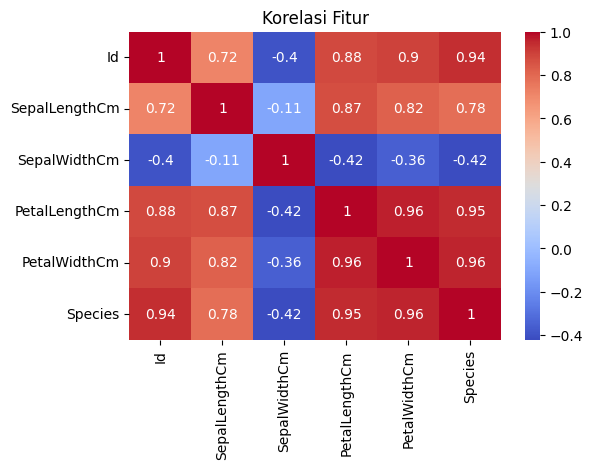

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

# **SPLITTING DATA**

In [ ]:
#Memilih Fitur dan Targer
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols]
y = df['Species']

In [ ]:
#Membagi Dataset
X_train, X_test, y_train, y_test= train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)
len(X_train), len(X_test)

(120, 30)

# **MODEL DECISSION TREE**

In [ ]:
#Membangun Model
dt = DecisionTreeClassifier(
    criterion= 'gini',
    max_depth= 5,
    random_state= 42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# **EVALUASI MODEL**

In [ ]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(
    y_test, y_pred, target_names=species_classes))

Akurasi: 93.33 %

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# **VISUALISASI HASIL MODEL**

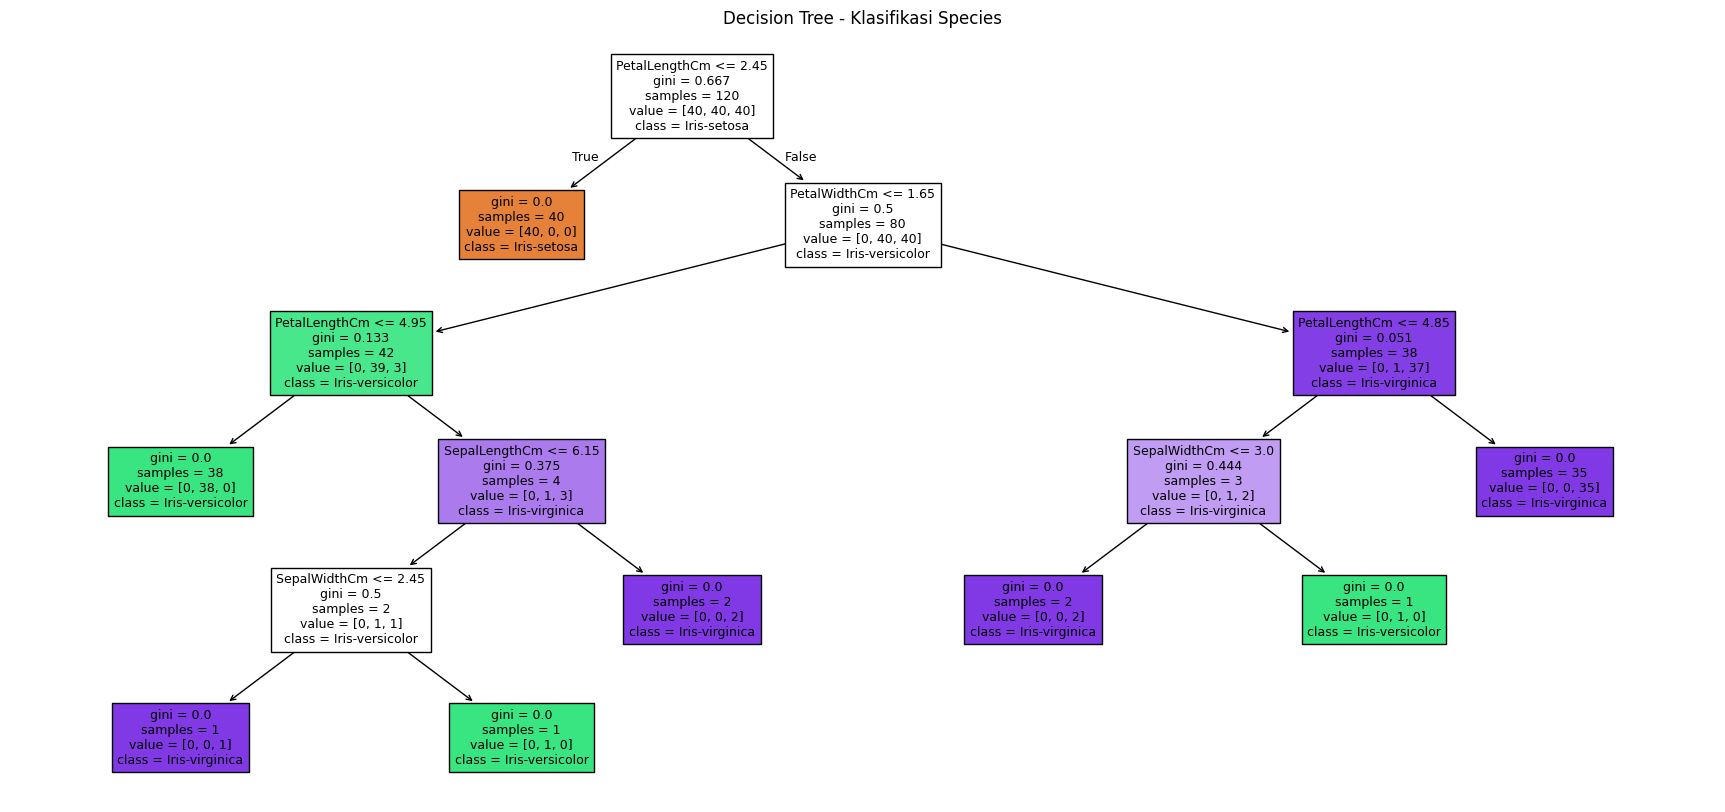

In [ ]:
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    filled=True,
    feature_names=feature_cols,
    class_names=species_classes, #Kembali ke nama asli
    fontsize=9)
plt.title('Decision Tree - Klasifikasi Species')
plt.show()

# **FEATURE IMPORTANCE**

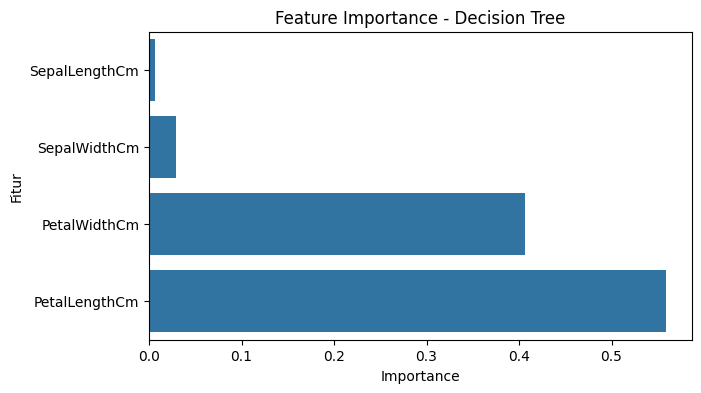

,0
SepalLengthCm,0.006250
SepalWidthCm,0.029167
PetalWidthCm,0.406015
PetalLengthCm,0.558568


In [ ]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=True)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.show()

imp

# **HYPERPARAMETER TUNING**

In [ ]:
scores = {}
for d in range(2, nine :=9):
  m = DecisionTreeClassifier(
      max_depth=d,
      random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(X_test))

  scores
  best_d = max(scores, key=scores.get)
  print("Best depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best depth: 2 | Acc: 93.33 %
Best depth: 3 | Acc: 96.67 %
Best depth: 3 | Acc: 96.67 %
Best depth: 3 | Acc: 96.67 %
Best depth: 3 | Acc: 96.67 %
Best depth: 3 | Acc: 96.67 %
Best depth: 3 | Acc: 96.67 %
